In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'PlantVillage_Split/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 12804 images belonging to 10 classes.


In [4]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.67058825 0.6156863  0.68235296]
  [0.6682392  0.6133372  0.6800039 ]
  [0.6628986  0.60799664 0.6746633 ]
  ...
  [0.52246666 0.47148624 0.5420745 ]
  [0.49492827 0.44394788 0.5145361 ]
  [0.5112936  0.46031314 0.53090143]]

 [[0.67058825 0.6156863  0.68235296]
  [0.66822684 0.6133248  0.67999154]
  [0.66430527 0.60940325 0.67607   ]
  ...
  [0.52852386 0.47754344 0.5481317 ]
  [0.5279624  0.476982   0.5475702 ]
  [0.5292279  0.47824755 0.54883575]]

 [[0.66743356 0.61253154 0.67919827]
  [0.6660318  0.6111298  0.6777965 ]
  [0.66274023 0.6078383  0.67450494]
  ...
  [0.53979814 0.4888177  0.559406  ]
  [0.55549365 0.50451326 0.5751015 ]
  [0.54295707 0.49197668 0.5625649 ]]

 ...

 [[0.6509804  0.6        0.6784314 ]
  [0.6509804  0.6        0.6784314 ]
  [0.6515932  0.6006128  0.67904425]
  ...
  [0.5391316  0.50383747 0.5861904 ]
  [0.56435424 0.5290601  0.61141306]
  [0.5755726  0.5402785  0.62263143]]

 [[0.6500355  0.5990551  0.6774865 ]
  [0.6509804  0.6        0.6784314 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'PlantVillage_Split/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'PlantVillage_Split/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1597 images belonging to 10 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5233409  0.50373304 0.5194193 ]
  [0.5944932  0.57488537 0.59057164]
  [0.5356194  0.51601154 0.5316978 ]
  ...
  [0.46656457 0.44695672 0.462643  ]
  [0.46520552 0.44559768 0.46128395]
  [0.46384647 0.44423863 0.4599249 ]]

 [[0.5168175  0.49720964 0.51289594]
  [0.599114   0.57950616 0.59519243]
  [0.5364348  0.516827   0.53251326]
  ...
  [0.44702587 0.42741802 0.4431043 ]
  [0.44621047 0.42660263 0.4422889 ]
  [0.44539502 0.42578718 0.44147345]]

 [[0.5102941  0.4906862  0.5063725 ]
  [0.6037348  0.58412695 0.5998132 ]
  [0.5372503  0.51764244 0.5333287 ]
  ...
  [0.43530038 0.4156925  0.4313788 ]
  [0.43638763 0.4167798  0.43246606]
  [0.43747488 0.417867   0.4335533 ]]

 ...

 [[0.27331412 0.2772357  0.29292196]
  [0.27195507 0.27587664 0.2915629 ]
  [0.27059606 0.27451763 0.2902039 ]
  ...
  [0.30589017 0.3019686  0.32157645]
  [0.29806122 0.29413965 0.3137475 ]
  [0.30194038 0.2980188  0.31762666]]

 [[0.26048738 0.26440895 0.28009522]
  [0.25967193 0.2635935  0.27927977]


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # you can also use 'val_loss'
    patience=12,  # number of epochs with no improvement after which training will stop
    restore_best_weights=True  # restores model to the best epoch with highest validation accuracy
)

In [14]:
checkpoint_callback = ModelCheckpoint(
    "best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping],
    validation_steps=6,
    verbose=1,
    epochs=50,
)

Epoch 1/50
47/47 [==============================] - ETA: 0s - loss: 0.5632 - accuracy: 0.7959
Epoch 1: val_accuracy did not improve from 0.81771
47/47 [==============================] - 10s 207ms/step - loss: 0.5632 - accuracy: 0.7959 - val_loss: 0.6865 - val_accuracy: 0.7500
Epoch 2/50
47/47 [==============================] - ETA: 0s - loss: 0.5421 - accuracy: 0.8045
Epoch 2: val_accuracy did not improve from 0.81771
47/47 [==============================] - 10s 207ms/step - loss: 0.5421 - accuracy: 0.8045 - val_loss: 0.6098 - val_accuracy: 0.8073
Epoch 3/50
47/47 [==============================] - ETA: 0s - loss: 0.5207 - accuracy: 0.8158
Epoch 3: val_accuracy improved from 0.81771 to 0.82812, saving model to best_model.h5
47/47 [==============================] - 10s 207ms/step - loss: 0.5207 - accuracy: 0.8158 - val_loss: 0.4920 - val_accuracy: 0.8281
Epoch 4/50
47/47 [==============================] - ETA: 0s - loss: 0.4860 - accuracy: 0.8251
Epoch 4: val_accuracy did not improve fr

In [18]:
scores = model.evaluate(test_generator)
scores

50/50 [==============================] - 9s 186ms/step - loss: 0.2698 - accuracy: 0.9105


[0.269758015871048, 0.9104571342468262]

In [19]:
history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

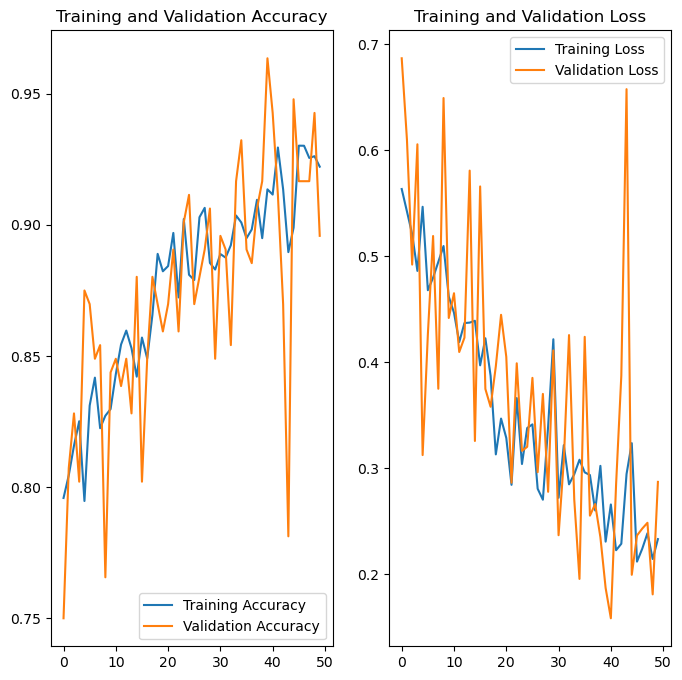

In [21]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Late_blight
1/1 [==============================] - 0s 112ms/step
predicted label: Tomato_Late_blight


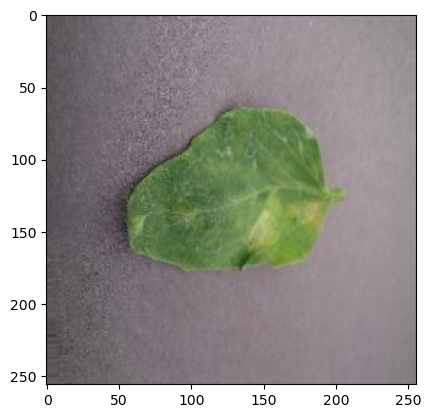

In [22]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 11ms/step


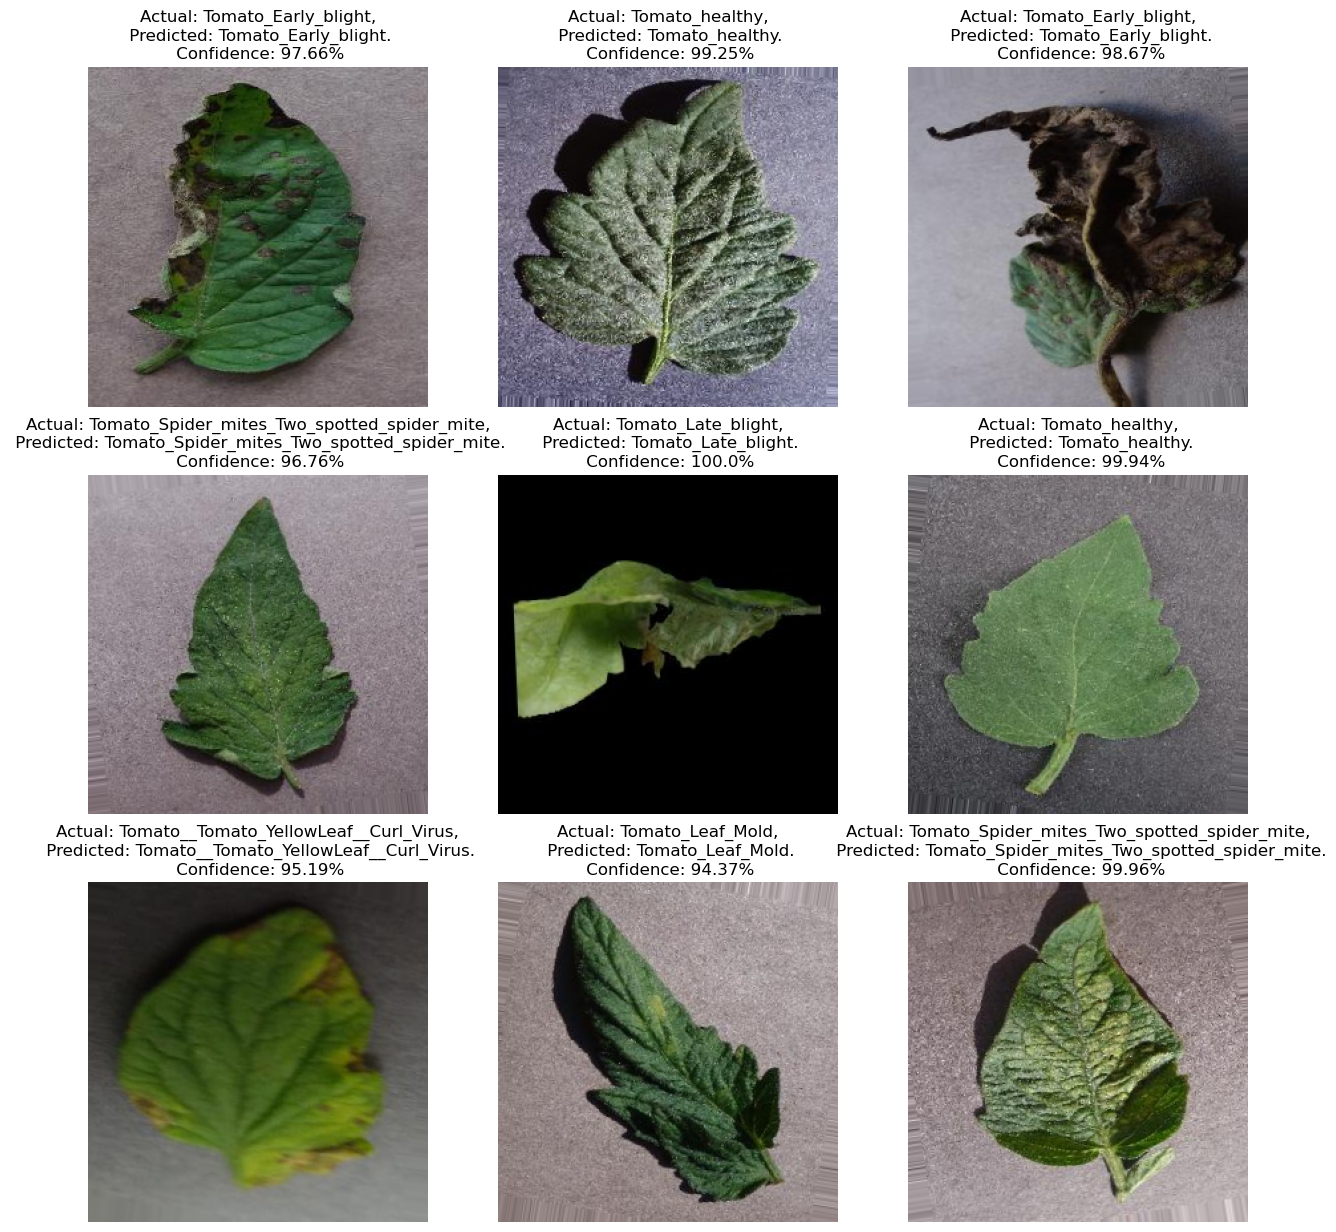

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [25]:
model.save("../tomato.h5")

In [27]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

model = load_model('toms.h5')

test_dir = 'PlantVillage_Split/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Set your image dimensions
    batch_size=1,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle for confusion matrix
)

Found 1597 images belonging to 10 classes.


In [28]:
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

1597/1597 [==============================] - 2s 1ms/step


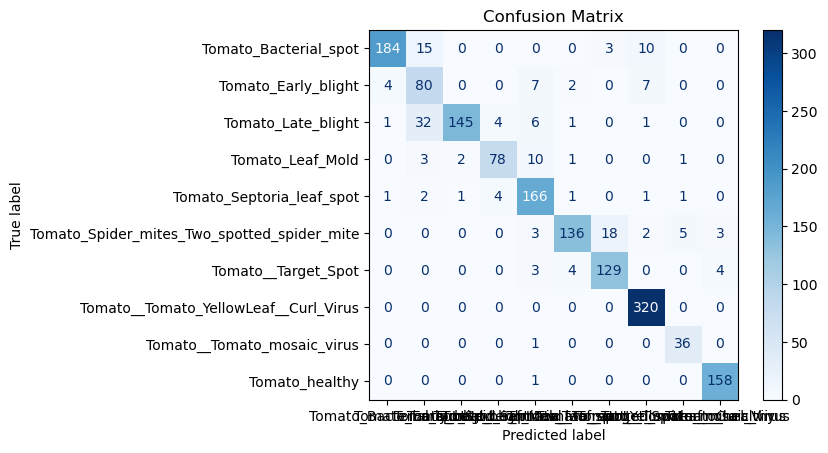

In [29]:
cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()